In [21]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt 
import numpy as np
import datetime as dt

In [2]:
df = pd.read_csv('../Solar_Energy_Production_20250219.csv')
df['date'] = pd.to_datetime(df['date'])
df['installationDate'] = pd.to_datetime(df['installationDate'])
# df = df.sort_values('date')
locations = df.name.unique()
df

,name,id,address,date,kWh,public_url,installationDate,uid
0,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017-09-11 08:00:00,1.130,https://monitoring.solaredge.com/solaredge-web...,2016-11-07,3141062017-09-11 08:00:00
1,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017-09-11 09:00:00,2.340,https://monitoring.solaredge.com/solaredge-web...,2016-11-07,3141062017-09-11 09:00:00
2,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017-09-11 10:00:00,3.656,https://monitoring.solaredge.com/solaredge-web...,2016-11-07,3141062017-09-11 10:00:00
3,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017-09-11 11:00:00,4.577,https://monitoring.solaredge.com/solaredge-web...,2016-11-07,3141062017-09-11 11:00:00
4,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017-09-11 12:00:00,6.506,https://monitoring.solaredge.com/solaredge-web...,2016-11-07,3141062017-09-11 12:00:00
...,...,...,...,...,...,...,...,...
337599,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,2025-02-16 12:00:00,4397.000,https://monitoringpublic.solaredge.com/solared...,2016-12-13,319086-2025-02-16 12:00:00
337600,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,2025-02-16 13:00:00,4541.000,https://monitoringpublic.solaredge.com/solared...,2016-12-13,319086-2025-02-16 13:00:00
337601,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,2025-02-16 14:00:00,3333.000,https://monitoringpublic.solaredge.com/solared...,2016-12-13,319086-2025-02-16 14:00:00
337602,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,2025-02-16 15:00:00,1408.000,https://monitoringpublic.solaredge.com/solared...,2016-12-13,319086-2025-02-16 15:00:00


In [22]:


# get installation date for each location
display( df[["name","installationDate"]].groupby("name").max()  )
#print latest installation date
print("Latest installation:", df["installationDate"].max() )

,installationDate
name,
Bearspaw Water Treatment Plant,2017-10-31
CFD Firehall #7,2017-09-13
Calgary Fire Hall Headquarters,2016-11-07
City of Calgary North Corporate Warehouse,2016-12-21
Glenmore Water Treatment Plant,2017-01-11
Hillhurst Sunnyside Community Association,2016-09-25
Manchester Building M,2017-10-23
Richmond - Knob Hill Community Hall,2016-11-21
Southland Leisure Centre,2015-09-01


Latest installation 2017-11-27 00:00:00


In [23]:
# print start and end dates of data for each location - check this matches installation date
print("Start:")
display( df[["name","date"]].groupby("name").min()  )

print("End:")
display( df[["name","date"]].groupby("name").max()  )

Start:


,date
name,
Bearspaw Water Treatment Plant,2017-11-21 10:45:00
CFD Firehall #7,2017-09-21 07:00:00
Calgary Fire Hall Headquarters,2016-11-24 14:00:00
City of Calgary North Corporate Warehouse,2016-12-23 09:30:00
Glenmore Water Treatment Plant,2017-03-08 10:00:00
Hillhurst Sunnyside Community Association,2016-10-03 13:00:00
Manchester Building M,2017-10-05 13:15:00
Richmond - Knob Hill Community Hall,2016-12-09 11:00:00
Southland Leisure Centre,2015-09-01 14:30:00


End:


,date
name,
Bearspaw Water Treatment Plant,2025-02-17 17:00:00
CFD Firehall #7,2025-02-17 16:00:00
Calgary Fire Hall Headquarters,2025-02-17 16:00:00
City of Calgary North Corporate Warehouse,2025-02-17 16:00:00
Glenmore Water Treatment Plant,2025-02-17 15:00:00
Hillhurst Sunnyside Community Association,2024-11-17 14:00:00
Manchester Building M,2025-02-17 16:00:00
Richmond - Knob Hill Community Hall,2025-02-17 16:00:00
Southland Leisure Centre,2025-02-17 16:00:00


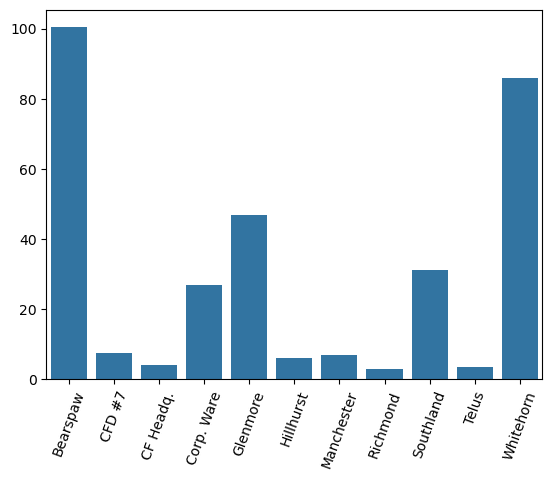

In [67]:
# lets take a look at the median production at each location
df_mean_output = df[["name","kWh"]].groupby("name").median()
# add some error bars for the standard dev
df_std_output = df[["name","kWh"]].groupby("name").std()
err_data = list(df_std_output["kWh"])
data = list(df_mean_output["kWh"])

# keys = list(df_mean_output.index)
keys = ['Bearspaw','CFD #7', 'CF Headq.', 'Corp. Ware', 
       'Glenmore', 'Hillhurst', 'Manchester', 'Richmond', 'Southland',
       'Telus', 'Whitehorn']
  
seaborn.barplot(x = keys, y = data) 
_ = plt.xticks(rotation=70)

conc2 = np.arange(0, len(keys))
width = .25
add = [-1*width, 0 , width, -1*width, 0 , width, -1*width, 0 , width,]
x = np.array(conc2)

# plt.errorbar(x = x, y = data,
#             yerr=err_data, fmt='none', c= 'black', capsize = 2)

,kWh
count,33735.000000
mean,17997.869884
std,60909.081751
min,0.001000
25%,15.451000
50%,100.395000
75%,319.198000
max,423471.000000


<Axes: xlabel='kWh', ylabel='Count'>

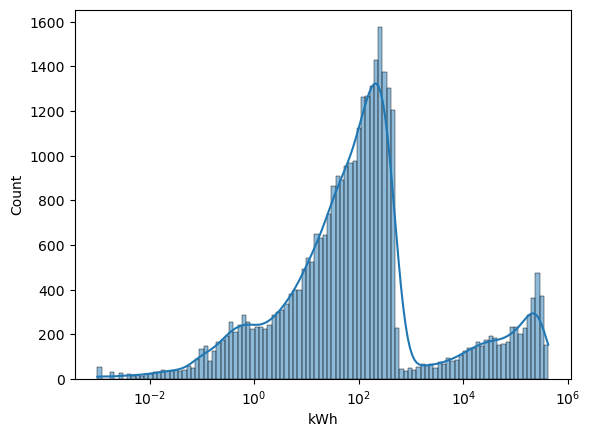

In [68]:
df_bearspaw = df[df["name"] == "Bearspaw Water Treatment Plant"]
display( df_bearspaw[["kWh"]].describe() )

seaborn.histplot(data = df_bearspaw, x = "kWh", log_scale=True, kde = True)

/var/folders/xm/fbpr6wj166n5b1320_w6jjnc0000gn/T/ipykernel_28306/1767595935.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  seaborn.kdeplot(data=dft, x = "kWh", log_scale=True, color=colors[i],


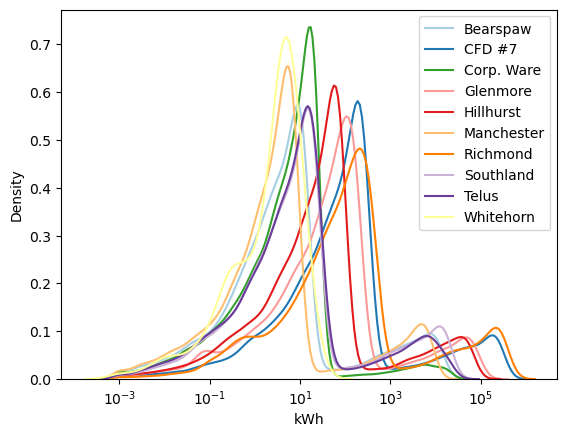

In [76]:
locations_names = ['Bearspaw','CFD #7', 'CF Headq.', 'Corp. Ware', 
       'Glenmore', 'Hillhurst', 'Manchester', 'Richmond', 'Southland',
       'Telus', 'Whitehorn']

colors = seaborn.color_palette("Paired", n_colors=len(locations))

for i,location in enumerate(locations):
    dft = df[df["name"] == location]
    seaborn.kdeplot(data=dft, x = "kWh", log_scale=True, color=colors[i], 
                    label = locations_names[i])
    
plt.legend()

In [3]:
# are data in regular intervals? - NO, not always!

for i,location in enumerate(locations):
    print(location)
    dft = df[df["name"] == location]
    dft = dft.sort_values('date')
    # shift the dates up and into a new column
    dft['dates_shift'] = dft['date'].shift(-1)
    # work out the diff
    dft['time_diff'] = (dft['dates_shift'] - dft['date']).abs() / pd.Timedelta(hours=1)
    print('--------------------------------------------------')
    print(dft["time_diff"].describe() )

Calgary Fire Hall Headquarters
--------------------------------------------------
count    34398.000000
mean         2.098087
std         12.636225
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       2015.000000
Name: time_diff, dtype: float64
Whitehorn Multi-Service Centre
--------------------------------------------------
count    36848.000000
mean         1.905972
std          4.718459
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        569.000000
Name: time_diff, dtype: float64
Southland Leisure Centre
--------------------------------------------------
count    40420.000000
mean         2.052684
std          7.430763
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        839.000000
Name: time_diff, dtype: float64
Hillhurst Sunnyside Community Association
--------------------------------------------------
count    25855.000000
mean         2.754167

In [3]:
location = locations[0]
dft = df[df["name"] == location]
dft = dft.sort_values('date')
# shift the dates up and into a new column
dft['dates_shift'] = dft['date'].shift(-1)
# work out the diff
dft['time_diff'] = (dft['dates_shift'] - dft['date']).abs() / pd.Timedelta(hours=1)
dft[dft["time_diff"] != 1.0][["time_diff", 'date','kWh']]

,time_diff,date,kWh
28355,2.0,2016-11-24 14:00:00,0.290
28356,114.0,2016-11-24 16:00:00,0.007
28357,77.0,2016-11-29 10:00:00,0.130
28721,2015.0,2016-12-02 15:00:00,0.005
16841,16.0,2017-02-24 17:00:00,0.027
...,...,...,...
335788,21.0,2025-02-13 14:00:00,1.000
335789,21.0,2025-02-14 13:00:00,5.000
335452,19.0,2025-02-15 15:00:00,1.000
335540,18.0,2025-02-16 15:00:00,9.000


In [16]:
# how far apart are theb locations?
save_path = '/Users/markhague/WORK/ML_PROJECTS/calgary_solar_production/'
df[['name', 'address']].drop_duplicates().to_csv(save_path+'locations_addresses.csv')
# have created a map of the locations

In [53]:
# slice the data to only be between 2018/01/01 - 2024/06/30
df_s = df.sort_values('date').set_index('date')
start = df_s.index.searchsorted(dt.datetime(2018, 1, 1,0))
end = df_s.index.searchsorted(dt.datetime(2024, 6, 30,23))
df_sub = df_s.iloc[start:end]

df_sub

,name,id,address,kWh,public_url,installationDate,uid
date,,,,,,,
2018-01-01 00:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,1.317,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502018-01-01 00:00:00
2018-01-01 01:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,1.324,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502018-01-01 01:00:00
2018-01-01 02:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,1.331,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502018-01-01 02:00:00
2018-01-01 03:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,1.361,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502018-01-01 03:00:00
2018-01-01 04:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,1.386,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502018-01-01 04:00:00
...,...,...,...,...,...,...,...
2024-06-30 21:00:00,CFD Firehall #7,551172,2708 4 ST NW,4.000,https://monitoringpublic.solaredge.com/solared...,2017-09-13,551172-2024-06-30 21:00:00
2024-06-30 21:00:00,Richmond - Knob Hill Community Hall,332785,2433 26 AV SW,2.000,https://monitoringpublic.solaredge.com/solared...,2016-11-21,332785-2024-06-30 21:00:00
2024-06-30 21:00:00,Glenmore Water Treatment Plant,355827,1634 56 AV SW,98.000,https://monitoringpublic.solaredge.com/solared...,2017-01-11,355827-2024-06-30 21:00:00


In [47]:
df_s.iloc[start]

name                                   Bearspaw Water Treatment Plant
id                                                             577650
address                                      11444 Bearspaw Dam RD NW
kWh                                                             1.317
public_url          https://monitoringpublic.solaredge.com/solared...
installationDate                                  2017-10-31 00:00:00
uid                                         5776502018-01-01 00:00:00
Name: 2018-01-01 00:00:00, dtype: object

<Axes: xlabel='kWh', ylabel='Count'>

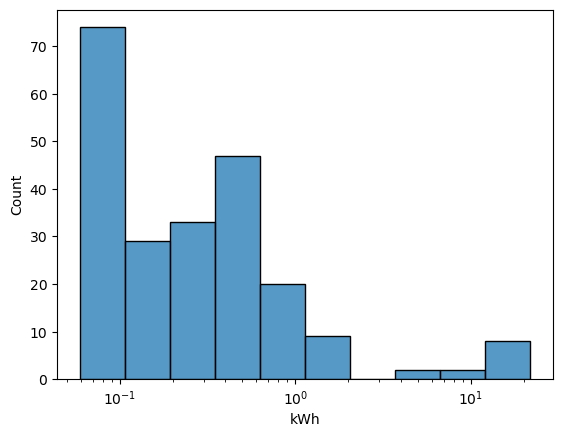

In [31]:
df_midnight_1am = df_s.between_time('00:00','01:00')
df_midday_1pm = df_s.between_time('12:00','13:00')

seaborn.histplot(data = df_midnight_1am, x = "kWh", log_scale=True)

In [52]:
# dft = df_s['2017-12-31':'2018-01-02']
# dftt = dft[dft['name'] == 'Bearspaw Water Treatment Plant']

# dftt.iloc[10:24]

,name,id,address,kWh,public_url,installationDate,uid
date,,,,,,,
2017-12-31 10:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,1.337,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502017-12-31 10:00:00
2017-12-31 11:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,3.579,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502017-12-31 11:00:00
2017-12-31 12:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,5.598,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502017-12-31 12:00:00
2017-12-31 13:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,5.126,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502017-12-31 13:00:00
2017-12-31 14:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2.922,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502017-12-31 14:00:00
2017-12-31 15:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,1.526,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502017-12-31 15:00:00
2017-12-31 16:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,1.340,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502017-12-31 16:00:00
2017-12-31 17:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,1.262,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502017-12-31 17:00:00
2017-12-31 18:00:00,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,1.146,https://monitoringpublic.solaredge.com/solared...,2017-10-31,5776502017-12-31 18:00:00
